### Importing Libraries and Data

In [43]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.8 MB 12.2 MB/s eta 0:00:02
   -------- ------------------------------- 5.2/25.8 MB 13.3 MB/s eta 0:00:02
   ------------ --------------------------- 8.1/25.8 MB 13.6 MB/s eta 0:00:02
   ----------------- ---------------------- 11.3/25.8 MB 13.8 MB/s eta 0:00:02
   --------------------- ------------------ 14.2/25.8 MB 14.1 MB/s eta 0:00:01
   -------------------------- ------------- 17.0/25.8 MB 14.1 MB/s eta 0:00:01
   ------------------------------- -------- 20.2/25.8 MB 14.3 MB/s eta 0:00:01
   ----------------------------------- ---- 23.1/25.8 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------  25.7/25.8 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 25.8/25.8 MB 12.8 MB/s eta 0:00:00


In [12]:
df = pd.read_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\rider_ACSdemos.feather')

In [14]:
df.head()

,MonthDT,Borough,ridership - Fair Fare,ridership - Full Fare,ridership - Other,ridership - Seniors & Disability,ridership - Student,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,transfer - Fair Fare,...,"15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more",Median household income (dollars),Mean household income (dollars)
0,01-2023,Bronx,455982.0,3374015.0,382456.0,215604.0,610250.0,675583.0,1018097.0,36609.0,...,"56,604","47,728","62,657","88,836","55,527","58,439","27,952","25,995","46,838","67,778"
1,01-2023,Brooklyn,784565.0,12450859.0,991470.0,747122.0,1487269.0,2250614.0,1899368.0,49188.0,...,"71,940","67,165","95,843","139,476","112,041","153,992","93,854","166,849","76,912","119,171"
2,01-2023,Manhattan,1216680.0,32841413.0,2099078.0,1724836.0,1619156.0,4734871.0,4360672.0,38804.0,...,"47,497","42,459","48,770","82,992","68,309","98,515","68,826","230,381","101,078","188,118"
3,01-2023,Queens,406791.0,7820247.0,588734.0,541866.0,892048.0,1653688.0,1770402.0,47193.0,...,"53,344","58,479","80,195","124,894","104,484","153,816","89,465","114,609","81,929","110,305"
4,01-2023,Staten Island,4919.0,109014.0,12882.0,8909.0,11095.0,11878.0,8685.0,1462.0,...,"10,048","9,570","15,343","17,478","17,599","32,517","20,906","28,877","95,543","118,855"


In [63]:
df.shape

(120, 67)

In [28]:
#converting MonthDT back to Datetime to plot
df['MonthDT'] = pd.to_datetime(df['MonthDT'])

<Axes: xlabel='MonthDT', ylabel='ridership - Full Fare'>

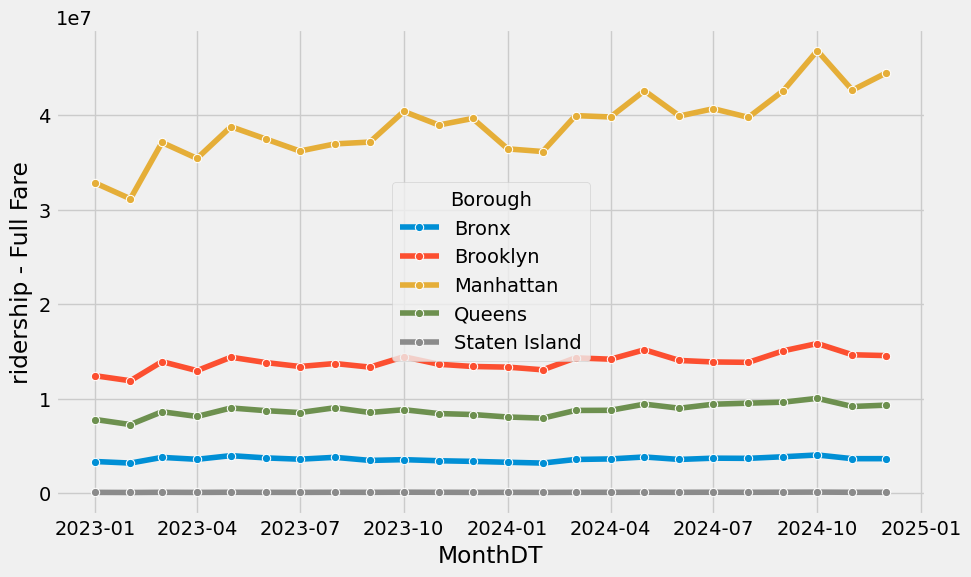

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='MonthDT', y='ridership - Full Fare', hue='Borough', marker='o')

### Timeseries Analysis Decompisition


--- Decomposing ridership for Bronx ---


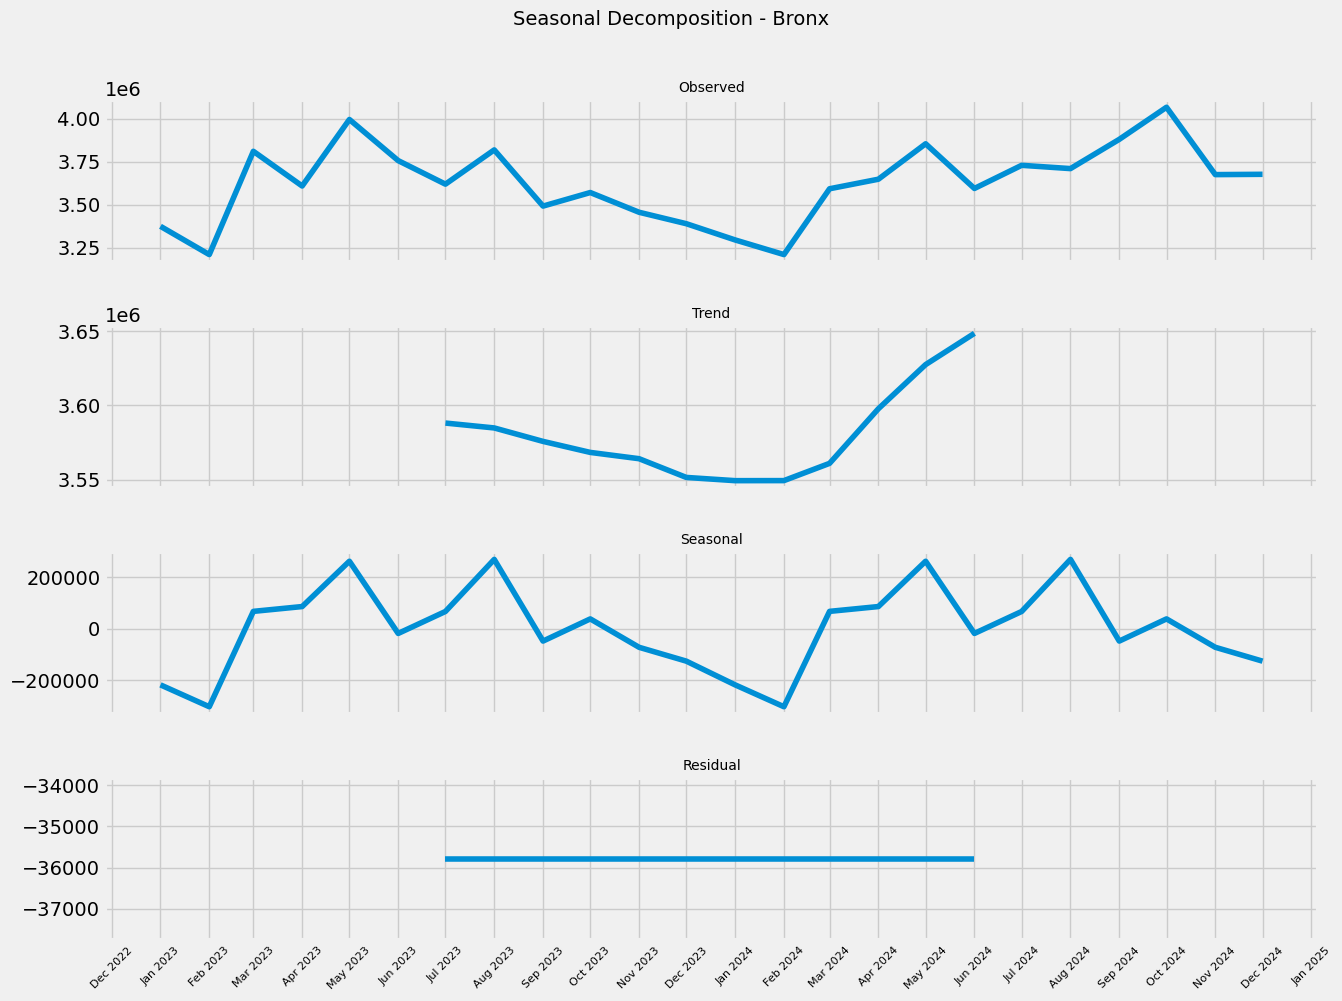


--- Decomposing ridership for Brooklyn ---


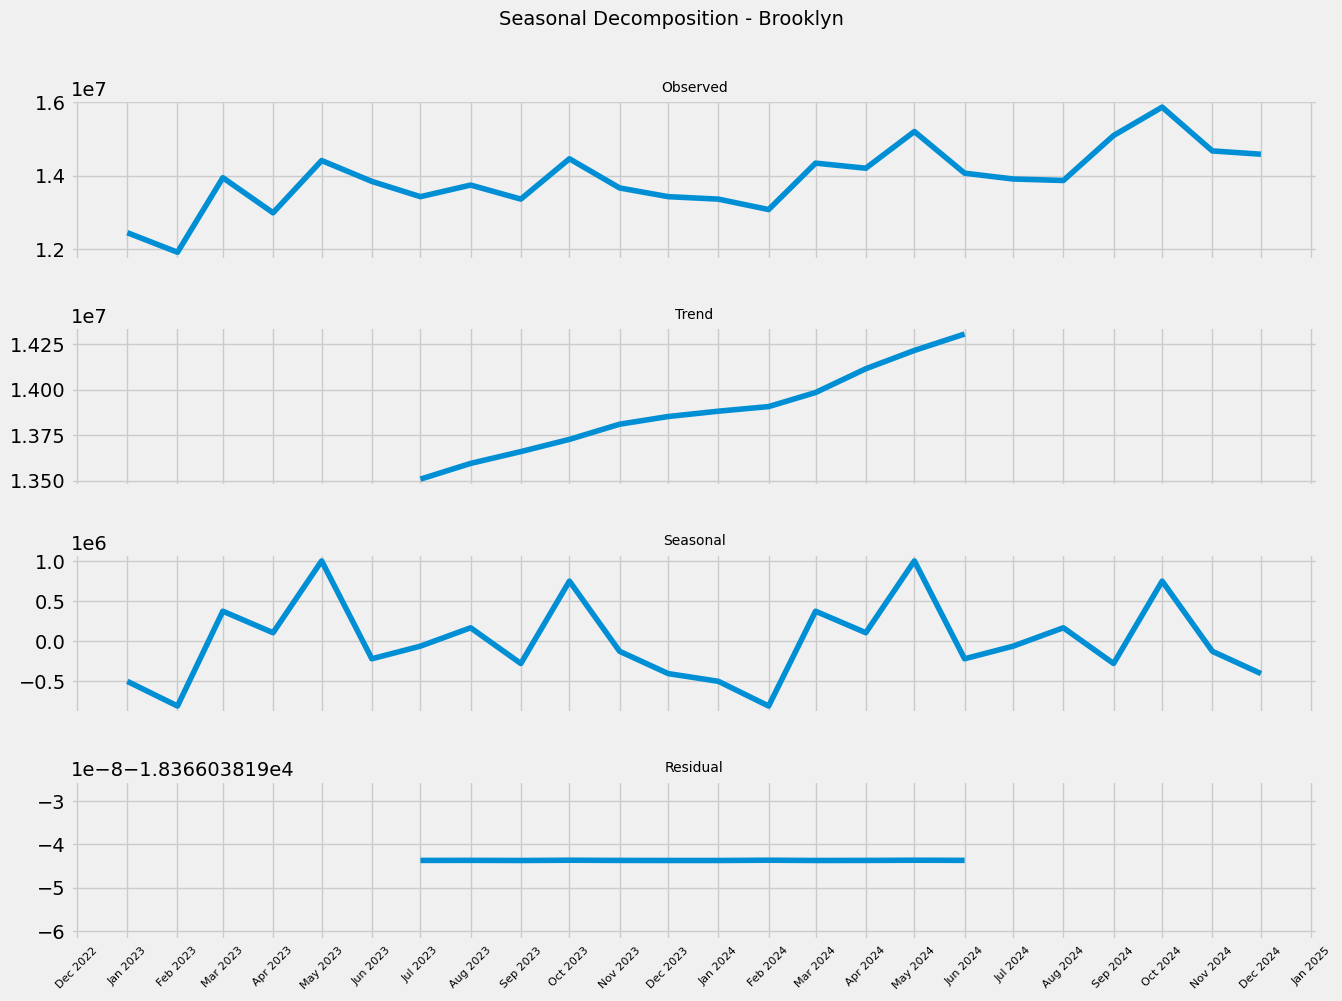


--- Decomposing ridership for Manhattan ---


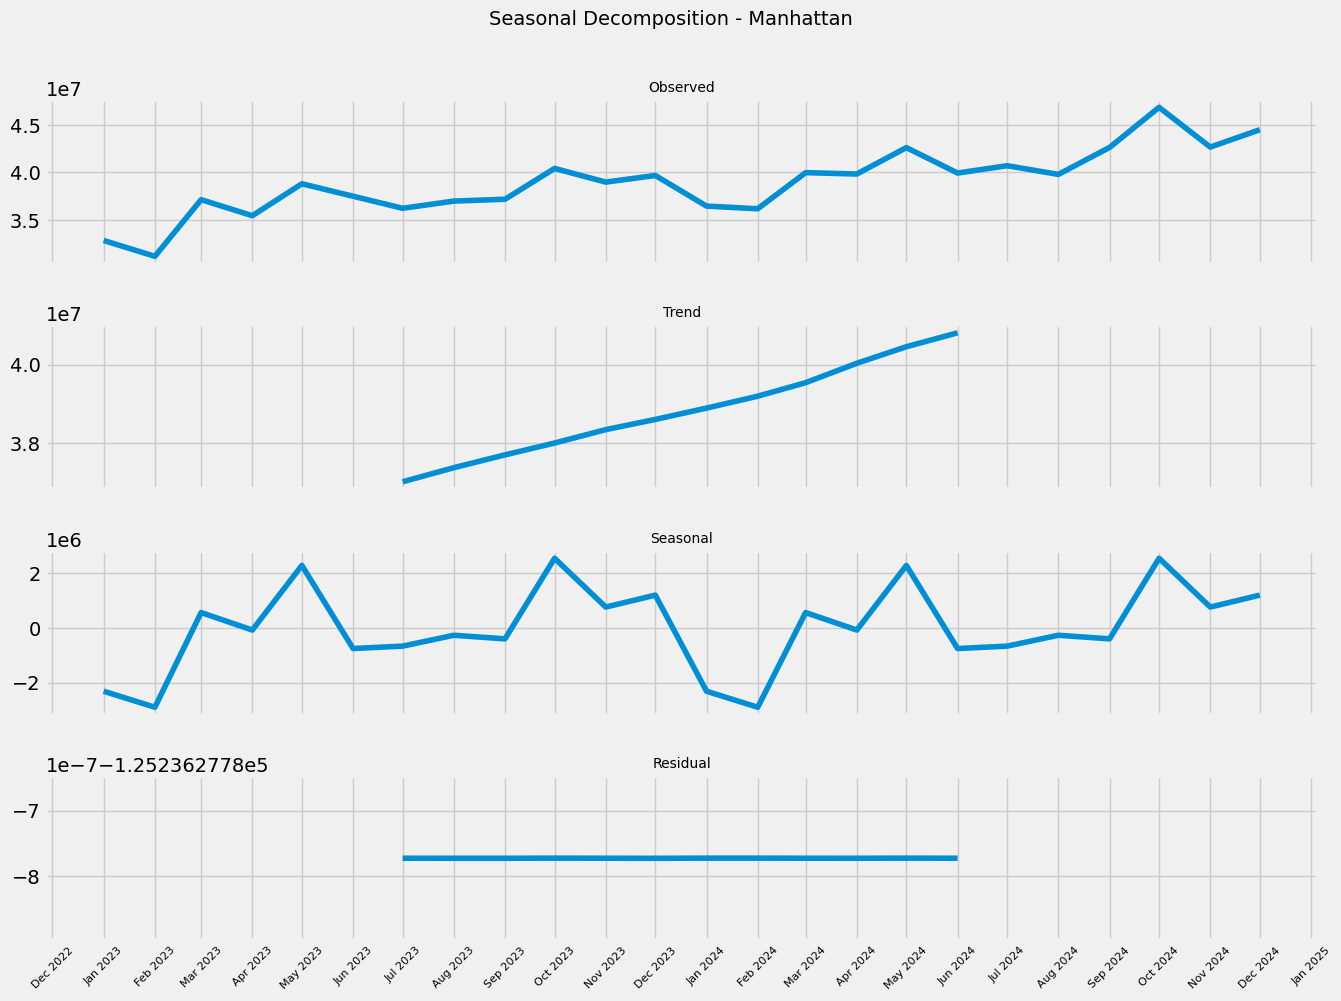


--- Decomposing ridership for Queens ---


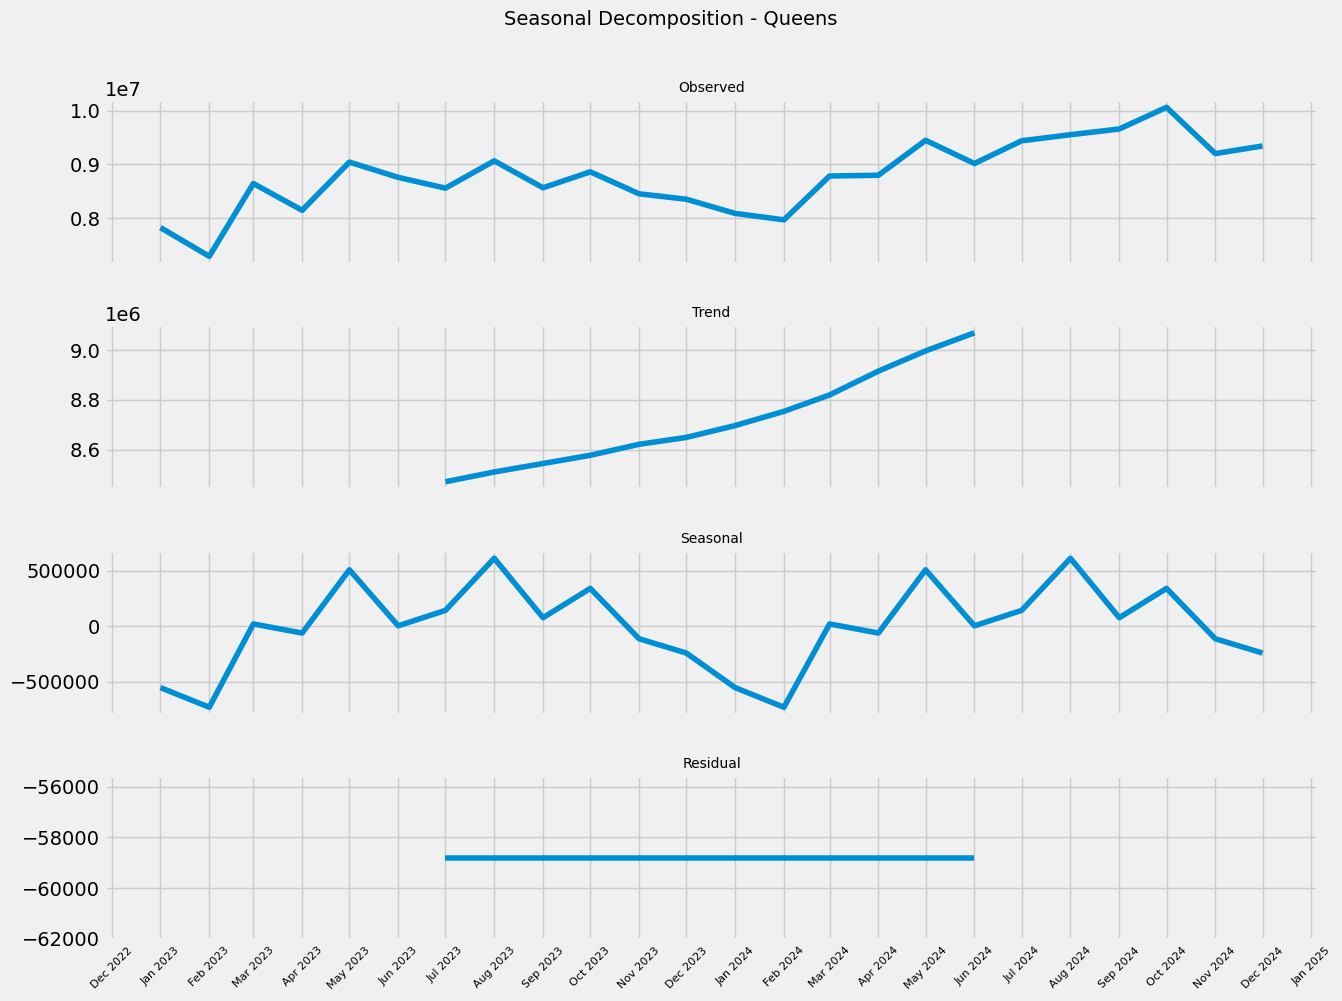


--- Decomposing ridership for Staten Island ---


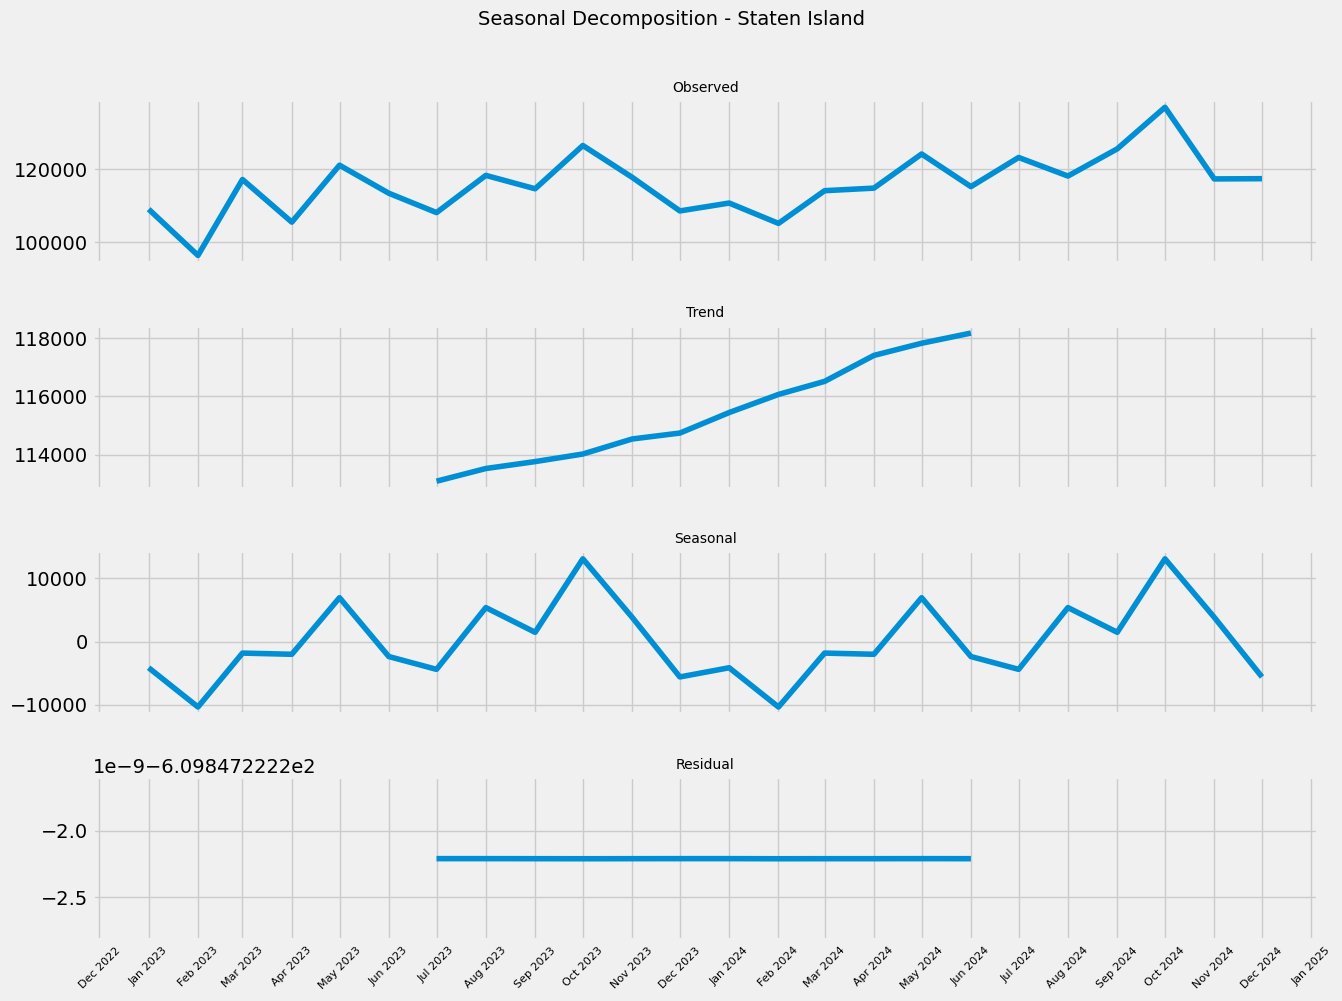

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure MonthDT is datetime
df['MonthDT'] = pd.to_datetime(df['MonthDT'])

# Loop through each borough
for borough in df['Borough'].unique():
    print(f"\n--- Decomposing ridership for {borough} ---")

    # Filter and prep
    boro_df = df[df['Borough'] == borough].copy()
    boro_df = boro_df.set_index('MonthDT').sort_index()
    boro_df = boro_df.asfreq('MS')

    if 'ridership - Full Fare' not in boro_df.columns:
        print(f"Column 'ridership - Full Fare' not found for {borough}. Skipping.")
        continue

    series = boro_df['ridership - Full Fare'].dropna()

    if len(series) < 24:
        print(f"Not enough data points ({len(series)}) for {borough}. Need at least 2 full cycles. Skipping.")
        continue

    try:
        result = seasonal_decompose(series, model='additive', period=12)

        # Plot manually
        fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
        components = {
            'Observed': result.observed,
            'Trend': result.trend,
            'Seasonal': result.seasonal,
            'Residual': result.resid
        }

        for ax, (title, data) in zip(axes, components.items()):
            valid = data.dropna()
            ax.plot(valid.index, valid.values)
            ax.set_title(title, fontsize=10)
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.tick_params(axis='x', rotation=45, labelsize=8)

        plt.suptitle(f"Seasonal Decomposition - {borough}", fontsize=14, y=1.02)
        plt.tight_layout(pad=2.0)
        plt.subplots_adjust(top=0.93)
        plt.show()

    except Exception as e:
        print(f"Error decomposing {borough}: {e}")

For the bronx, Trend shows us theres a dip in the beginning of 2024 before seeing a sharp rise in ridership. Seasonality shows that there are peaks in May and August which repeat both in 2023 and 2024 and the dips in Feb are also reflected here. With the redisdual being a straight line i believe this means that there are no unusual events beyond the seasonality and trends. 

For brooklyn, There is no dip and only an upward trend.  And in Seasonality we see the same peaks in May that were witnessed for the Bronx but there are also peaks in Oct.  Despite there being no dip in the trend, there does seem to be a dip shown in seasonality in the Feb of 2024 as seen in the Bronx. With the redisdual being a straight line i believe this means that there are no unusual events beyond the seasonality and trends.

Manhattan also shows only an upward trend.  Seasonality has all the same peaks and dips as Brooklyn (peaks in May/Oct dips in Feb). With the redisdual being a straight line i believe this means that there are no unusual events beyond the seasonality and trends.

Queens also shows only an upward trend. Insterestingly for Seasonality it has all the peaks and dips shown by other boroughs, (Peaks in May August AND October with dips in Feb) With the redisdual being a straight line i believe this means that there are no unusual events beyond the seasonality and trends.

Staten Island also shows only an upward trend. And seasonally has the May and October peaks with the February dips.  With the redisdual being a straight line i believe this means that there are no unusual events beyond the seasonality and trends.

In [61]:
from statsmodels.tsa.stattools import adfuller

# Loop through each borough
for borough in df['Borough'].unique():
    print(f"\n--- Dickey-Fuller Test for {borough} ---")

    series = boro_df['ridership - Full Fare'].dropna()

    if len(series) < 24:
        print(f"Not enough data to run ADF test for {borough}. Skipping.")
        continue

    # Run ADF test
    result = adfuller(series)

    # Unpack result
    test_statistic, p_value, used_lag, n_obs, crit_values, icbest = result

    # Print results
    print(f"ADF Statistic: {test_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Number of Lags Used: {used_lag}")
    print(f"Number of Observations Used: {n_obs}")
    print("Critical Values:")
    for key, value in crit_values.items():
        print(f"   {key}: {value:.4f}")

    if p_value < 0.05:
        print("✅ The time series is likely stationary (reject H0).")
    else:
        print("❌ The time series is likely non-stationary (fail to reject H0).")


--- Dickey-Fuller Test for Bronx ---
ADF Statistic: -3.6421
p-value: 0.0050
Number of Lags Used: 0
Number of Observations Used: 23
Critical Values:
   1%: -3.7529
   5%: -2.9985
   10%: -2.6390
✅ The time series is likely stationary (reject H0).

--- Dickey-Fuller Test for Brooklyn ---
ADF Statistic: -3.6421
p-value: 0.0050
Number of Lags Used: 0
Number of Observations Used: 23
Critical Values:
   1%: -3.7529
   5%: -2.9985
   10%: -2.6390
✅ The time series is likely stationary (reject H0).

--- Dickey-Fuller Test for Manhattan ---
ADF Statistic: -3.6421
p-value: 0.0050
Number of Lags Used: 0
Number of Observations Used: 23
Critical Values:
   1%: -3.7529
   5%: -2.9985
   10%: -2.6390
✅ The time series is likely stationary (reject H0).

--- Dickey-Fuller Test for Queens ---
ADF Statistic: -3.6421
p-value: 0.0050
Number of Lags Used: 0
Number of Observations Used: 23
Critical Values:
   1%: -3.7529
   5%: -2.9985
   10%: -2.6390
✅ The time series is likely stationary (reject H0).

---


--- ACF Plot for Bronx ---


<Figure size 2000x1000 with 0 Axes>

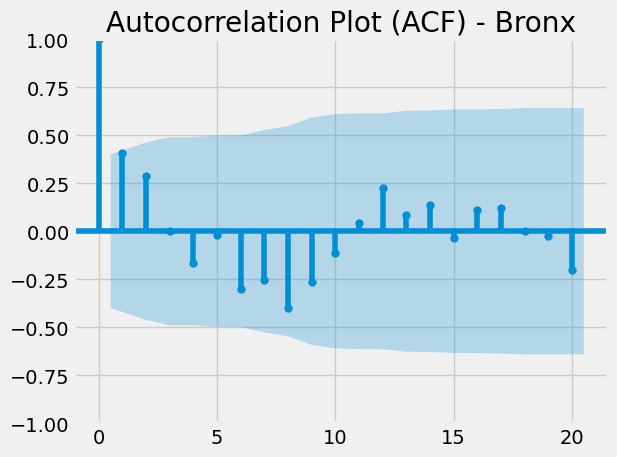


--- ACF Plot for Brooklyn ---


<Figure size 2000x1000 with 0 Axes>

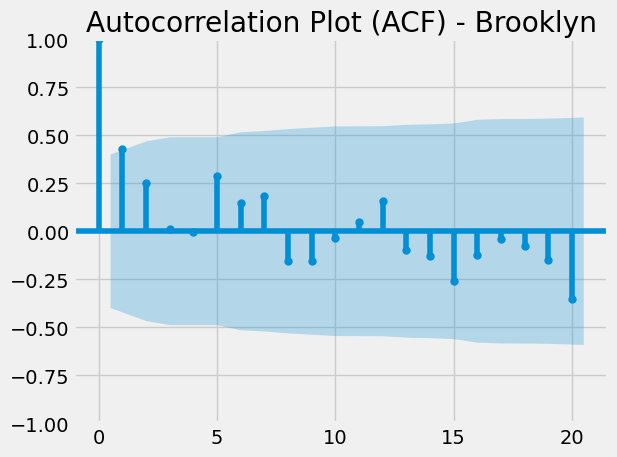


--- ACF Plot for Manhattan ---


<Figure size 2000x1000 with 0 Axes>

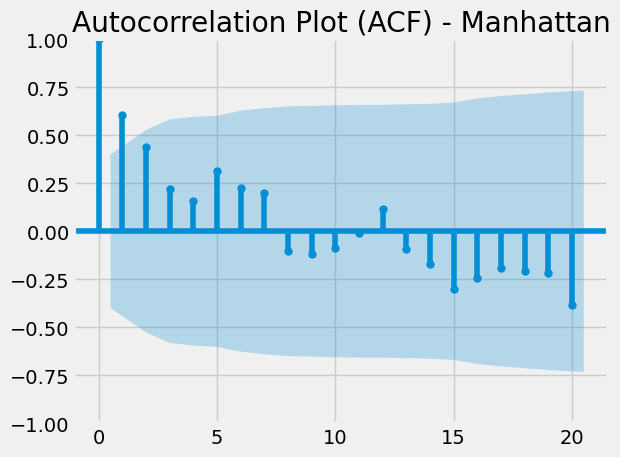


--- ACF Plot for Queens ---


<Figure size 2000x1000 with 0 Axes>

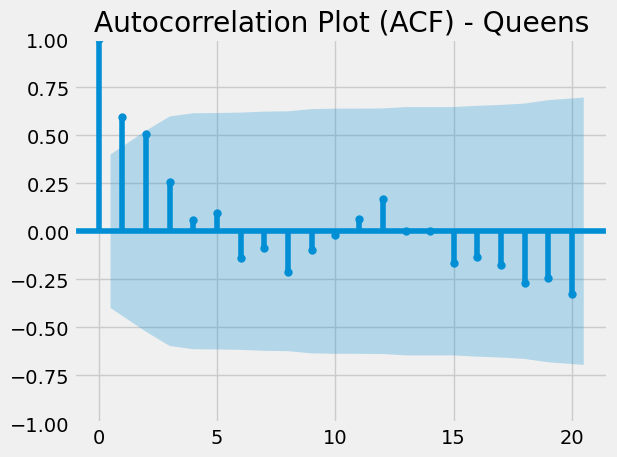


--- ACF Plot for Staten Island ---


<Figure size 2000x1000 with 0 Axes>

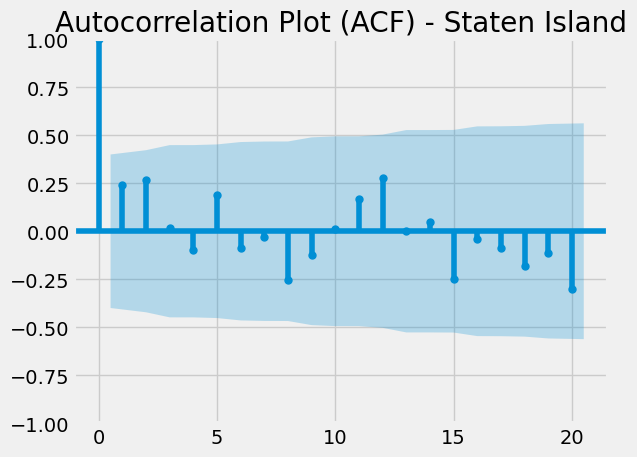

In [67]:
from statsmodels.graphics.tsaplots import plot_acf


# Loop through each borough
for borough in df['Borough'].unique():
    print(f"\n--- ACF Plot for {borough} ---")

    # Filter and prep
    boro_df = df[df['Borough'] == borough].copy()
    boro_df = boro_df.set_index('MonthDT').sort_index()
    boro_df = boro_df.asfreq('MS')  # Ensure monthly frequency

    # Drop NaNs
    series = boro_df['ridership - Full Fare'].dropna()

    if len(series) < 20:
        print(f"Not enough data points for {borough}. Skipping.")
        continue

    # Plot ACF
    plt.figure(figsize=(20, 10))
    plot_acf(series, lags=20, alpha=0.05)
    plt.title(f"Autocorrelation Plot (ACF) - {borough}")
    plt.tight_layout()
    plt.show()

Since for all of the charts the majority of the lines all fall within the confidence interval, this means that the data is sufficiently stationary.
Additionally all of the peaks and dips observed from the decompisition charts are also reflected here meaning the data has strong seasonality. 